In [1]:
import platform
print(platform.python_version())

3.6.4


In [2]:
import warnings
warnings.filterwarnings(action = 'once')

### Instantiate environment

In [3]:
# import dataiku
# from dataiku import pandasutils as pdu

import pandas as pd
import numpy as np
import os
from rdkit import Chem
from rdkit.Chem import PandasTools
from rdkit.Chem import Descriptors
from rdkit.ML.Descriptors import MoleculeDescriptors
import sklearn
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import VarianceThreshold
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error
from sklearn.ensemble import RandomForestRegressor
import matplotlib.pyplot as plt 
import math


C:\Users\us16120\Anaconda3\lib\importlib\_bootstrap.py:219: ImportWarning: can't resolve package from __spec__ or __package__, falling back on __name__ and __path__
  return f(*args, **kwds)
C:\Users\us16120\Anaconda3\lib\importlib\_bootstrap.py:219: ImportWarning: can't resolve package from __spec__ or __package__, falling back on __name__ and __path__
  return f(*args, **kwds)
C:\Users\us16120\Anaconda3\lib\site-packages\_pytest\fixtures.py:844: DeprecationWarning: The `convert` argument is deprecated in favor of `converter`.  It will be removed after 2019/01.
  params = attr.ib(convert=attr.converters.optional(tuple))


### Read data

In [4]:
# folder_path = dataiku.Folder("data").get_path()
# train_df = PandasTools.LoadSDF(os.path.join(folder_path, "TR_AOH_516.sdf"))
# test_df = PandasTools.LoadSDF(os.path.join(folder_path, "TST_AOH_176.sdf"))

train_df = PandasTools.LoadSDF("data/TR_AOH_516.sdf")
test_df = PandasTools.LoadSDF("data/TST_AOH_176.sdf")

,CAS,Canonical_QSARr,ChemID,ID,InChI Key_QSARr,InChI_Code_QSARr,LogOH,MPID,NAME,OH,OH Data Type,OH Reference,OH Temperature,ROMol,SMILES,dsstox_substance_id,iupac,preferred_name,source_casrn
0,57-55-6,CC(O)CO,100004,100004,DNIAPMSPPWPWGF-UHFFFAOYSA-N,"InChI=1S/C3H8O2/c1-3(5)2-4/h3-5H,2H2,1H3",-10.920818753952396,98574,"1,2-PROPANEDIOL",1.2E-11,EXP,"ATKINSON,R (1989)",25.0,,CC(O)CO,DTXSID0021206,"propane-1,2-diol","1,2-Propylene glycol",57-55-6
1,62-53-3,Nc1ccccc1,100008,100008,PAYRUJLWNCNPSJ-UHFFFAOYSA-N,"InChI=1S/C6H7N/c7-6-4-2-1-3-5-6/h1-5H,7H2",-9.954677021213335,98578,ANILINE,1.11E-10,EXP,"KWOK,ESC & ATKINSON,R (1994)",25.0,,Nc1ccccc1,DTXSID8020090,aniline,Aniline,62-53-3
2,64-19-7,CC(O)=O,100012,100012,QTBSBXVTEAMEQO-UHFFFAOYSA-N,"InChI=1S/C2H4O2/c1-2(3)4/h1H3,(H,3,4)",-12.130768280269036,98582,ACETIC ACID,7.399999999999999E-13,EXP,"ATKINSON,R (1989)",25.0,,CC(O)=O,DTXSID5024394,acetic acid,Acetic acid,64-19-7
3,67-63-0,CC(C)O,100016,100016,KFZMGEQAYNKOFK-UHFFFAOYSA-N,"InChI=1S/C3H8O/c1-3(2)4/h3-4H,1-2H3",-11.294992040666681,98586,ISOPROPANOL,5.07E-12,EXP,"KWOK,ESC & ATKINSON,R (1994)",25.0,,CC(C)O,DTXSID7020762,propan-2-ol,Isopropanol,67-63-0
4,71-23-8,CCCO,100020,100020,BDERNNFJNOPAEC-UHFFFAOYSA-N,"InChI=1S/C3H8O/c1-2-3-4/h4H,2-3H2,1H3",-11.257274868695298,98590,1-PROPANOL,5.530000000000001E-12,EXP,"KWOK,ESC & ATKINSON,R (1994)",25.0,,CCCO,DTXSID2021739,propan-1-ol,1-Propanol,71-23-8

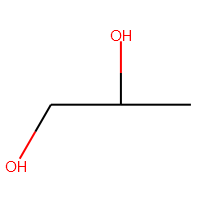
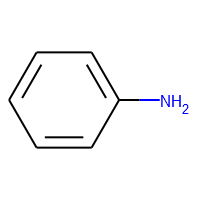
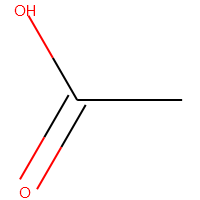
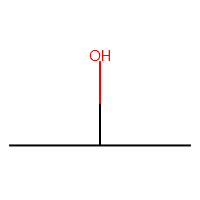
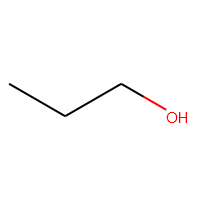

In [5]:
train_df.head()
test_df.head()

### Concatenate data

In [6]:
AOH = pd.concat([train_df[["Canonical_QSARr", "LogOH"]],
                 test_df[["Canonical_QSARr", "LogOH"]]], ignore_index = True)
AOH['LogOH'] = pd.to_numeric(AOH['LogOH'])

In [7]:
AOH.head()

,Canonical_QSARr,LogOH
0,C=O,-11.028260
1,ClC(Cl)(Cl)Cl,-15.920819
2,ClC1C(Cl)C(Cl)C(Cl)C(Cl)C1Cl,-12.782516
3,CCOCC,-10.882729
4,CNN,-10.187087


### Calculate Features

In [8]:
nms = [x[0] for x in Descriptors._descList]
calc = MoleculeDescriptors.MolecularDescriptorCalculator(nms)
for i in range(len(AOH)):
    descrs = calc.CalcDescriptors(Chem.MolFromSmiles(AOH.iloc[i, 0]))
    for x in range(len(descrs)):
        AOH.at[i, str(nms[x])] = descrs[x]
AOH = AOH.dropna()

In [9]:
AOH.head()

,Canonical_QSARr,LogOH,MaxEStateIndex,MinEStateIndex,MaxAbsEStateIndex,MinAbsEStateIndex,qed,MolWt,HeavyAtomMolWt,ExactMolWt,NumValenceElectrons,NumRadicalElectrons,MaxPartialCharge,MinPartialCharge,MaxAbsPartialCharge,MinAbsPartialCharge,FpDensityMorgan1,FpDensityMorgan2,FpDensityMorgan3,BalabanJ,BertzCT,Chi0,Chi0n,Chi0v,Chi1,Chi1n,Chi1v,Chi2n,Chi2v,Chi3n,Chi3v,Chi4n,Chi4v,HallKierAlpha,Ipc,Kappa1,Kappa2,Kappa3,LabuteASA,PEOE_VSA1,PEOE_VSA10,PEOE_VSA11,PEOE_VSA12,PEOE_VSA13,PEOE_VSA14,PEOE_VSA2,PEOE_VSA3,PEOE_VSA4,PEOE_VSA5,PEOE_VSA6,PEOE_VSA7,PEOE_VSA8,PEOE_VSA9,SMR_VSA1,SMR_VSA10,SMR_VSA2,SMR_VSA3,SMR_VSA4,SMR_VSA5,SMR_VSA6,SMR_VSA7,SMR_VSA8,SMR_VSA9,SlogP_VSA1,SlogP_VSA10,SlogP_VSA11,SlogP_VSA12,SlogP_VSA2,SlogP_VSA3,SlogP_VSA4,SlogP_VSA5,SlogP_VSA6,SlogP_VSA7,SlogP_VSA8,SlogP_VSA9,TPSA,EState_VSA1,EState_VSA10,EState_VSA11,EState_VSA2,EState_VSA3,EState_VSA4,EState_VSA5,EState_VSA6,EState_VSA7,EState_VSA8,EState_VSA9,VSA_EState1,VSA_EState10,VSA_EState2,VSA_EState3,VSA_EState4,VSA_EState5,VSA_EState6,VSA_EState7,VSA_EState8,VSA_EState9,FractionCSP3,HeavyAtomCount,NHOHCount,NOCount,NumAliphaticCarbocycles,NumAliphaticHeterocycles,NumAliphaticRings,NumAromaticCarbocycles,NumAromaticHeterocycles,NumAromaticRings,NumHAcceptors,NumHDonors,NumHeteroatoms,NumRotatableBonds,NumSaturatedCarbocycles,NumSaturatedHeterocycles,NumSaturatedRings,RingCount,MolLogP,MolMR,fr_Al_COO,fr_Al_OH,fr_Al_OH_noTert,fr_ArN,fr_Ar_COO,fr_Ar_N,fr_Ar_NH,fr_Ar_OH,fr_COO,fr_COO2,fr_C_O,fr_C_O_noCOO,fr_C_S,fr_HOCCN,fr_Imine,fr_NH0,fr_NH1,fr_NH2,fr_N_O,fr_Ndealkylation1,fr_Ndealkylation2,fr_Nhpyrrole,fr_SH,fr_aldehyde,fr_alkyl_carbamate,fr_alkyl_halide,fr_allylic_oxid,fr_amide,fr_amidine,fr_aniline,fr_aryl_methyl,fr_azide,fr_azo,fr_barbitur,fr_benzene,fr_benzodiazepine,fr_bicyclic,fr_diazo,fr_dihydropyridine,fr_epoxide,fr_ester,fr_ether,fr_furan,fr_guanido,fr_halogen,fr_hdrzine,fr_hdrzone,fr_imidazole,fr_imide,fr_isocyan,fr_isothiocyan,fr_ketone,fr_ketone_Topliss,fr_lactam,fr_lactone,fr_methoxy,fr_morpholine,fr_nitrile,fr_nitro,fr_nitro_arom,fr_nitro_arom_nonortho,fr_nitroso,fr_oxazole,fr_oxime,fr_para_hydroxylation,fr_phenol,fr_phenol_noOrthoHbond,fr_phos_acid,fr_phos_ester,fr_piperdine,fr_piperzine,fr_priamide,fr_prisulfonamd,fr_pyridine,fr_quatN,fr_sulfide,fr_sulfonamd,fr_sulfone,fr_term_acetylene,fr_tetrazole,fr_thiazole,fr_thiocyan,fr_thiophene,fr_unbrch_alkane,fr_urea
0,C=O,-11.028260,8.000000,2.000000,8.000000,2.000000,0.360624,30.026,28.010,30.010565,12.0,0.0,0.106382,-0.307097,0.307097,0.106382,1.500000,1.500000,1.5,2.000000,2.000000,2.000000,1.115355,1.115355,1.000000,0.288675,0.288675,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-0.33,2.000000,1.67000,0.670000,-5.360303,12.900773,4.794537,6.789076,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.00000,0.000000,0.000000,0.000000,4.794537,6.789076,0.0,0.000000,0.00000,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,6.789076,4.794537,0.0,0.000000,0.0,0.0,0.0,0.0,17.07,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,6.789076,0.000000,4.794537,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,10.00000,0.0,2.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,-0.1849,7.1210,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,ClC(Cl)(Cl)Cl,-15.920819,4.826389,-1.611111,4.826389,1.611111,0.469796,153.823,153.823,151.875411,32.0,0.0,0.265685,-0.066421,0.265685,0.066421,0.800000,0.800000,0.8,3.023716,19.119415,4.500000,2.011858,5.035574,2.000000,0.755929,2.267787,0.428571,3.857143,0.000000,0.000000,0.000000,0.000000,1.16,3.609640,6.16000,1.741848,38.291986,49.952316,0.000000,0.000000,0.0,0.0,3.251718,0.0,0.000000,0.0,0.0,0.000000,46.40376,0.000000,0.000000,0.000000,0.000000,46.403760,0.0,0.00000

### Training and Test Datasets

In [10]:
X = AOH.drop(["Canonical_QSARr", "LogOH"], axis = 1)
y = AOH[["LogOH"]]
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    random_state = 350,
                                                    test_size = 0.2)

### Identify / remove near-zero variance descriptors

In [11]:
def variance_threshold_selector(data, threshold = 0.5):
    selector = VarianceThreshold(threshold)
    selector.fit(data)
    return data[data.columns[selector.get_support(indices = True)]]

nzv = variance_threshold_selector(X_train, 0.0)

X_train = X_train[nzv.columns]
X_test = X_test[nzv.columns]

In [12]:
X_train.shape

(552, 158)

### Identify / remove highly correlated descriptors

In [13]:
corr_matrix = X_train.corr().abs()
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape),
                                  k = 1).astype(np.bool))
to_drop = [column for column in upper.columns
           if any(upper[column] > 0.85)]

X_train = X_train[X_train.columns.drop(to_drop)]
X_test = X_test[X_test.columns.drop(to_drop)]

In [14]:
X_train.shape

(552, 103)

### standardize features by removing the mean and scaling to unit variance

In [15]:
scaler = StandardScaler()
scaler.fit(X_train)

X_train_standard = scaler.transform(X_train)
X_test_standard = scaler.transform(X_test)

## Machine Learning Algorithms

### TPOT

In [16]:
from tpot import TPOTRegressor
tpot = TPOTRegressor(generations=10, population_size=50, verbosity=2)
tpot.fit(X_train_standard, y_train)
print(tpot.score(X_test_standard, y_test))
tpot.export('tpot_AOH_pipeline.py')

C:\Users\us16120\Anaconda3\lib\site-packages\deap\tools\_hypervolume\pyhv.py:33: ImportWarning: Falling back to the python version of hypervolume module. Expect this to be very slow.
  "module. Expect this to be very slow.", ImportWarning)


C:\Users\us16120\Anaconda3\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Generation 1 - Current best internal CV score: -0.3069384627698265


Generation 2 - Current best internal CV score: -0.2662278179429202


Generation 3 - Current best internal CV score: -0.22057447257652657


Generation 4 - Current best internal CV score: -0.220299937078232


Generation 5 - Current best internal CV score: -0.220299937078232


Generation 6 - Current best internal CV score: -0.220299937078232


Generation 7 - Current best internal CV score: -0.220299937078232


Generation 8 - Current best internal CV score: -0.220299937078232


Generation 9 - Current best internal CV score: -0.220299937078232


Generation 10 - Current best internal CV score: -0.220299937078232



Best pipeline: ExtraTreesRegressor(ElasticNetCV(MaxAbsScaler(input_matrix), l1_ratio=0.35000000000000003, tol=0.0001), bootstrap=False, max_features=0.7000000000000001, min_samples_leaf=2, min_samples_split=2, n_estimators=100)
-0.15904175251834346


True

In [22]:
import numpy as np
import pandas as pd
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.linear_model import ElasticNetCV
from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline, make_union
from sklearn.preprocessing import MaxAbsScaler
from tpot.builtins import StackingEstimator

In [18]:
### dataset for prediction modeling
dframe = PandasTools.LoadSDF("data/TST_AOH_176.sdf")

dframe = dframe[["Canonical_QSARr", "LogOH"]]

In [19]:
### Calculate features
nms = [x[0] for x in Descriptors._descList]
calc = MoleculeDescriptors.MolecularDescriptorCalculator(nms)
for i in range(len(dframe)):
    descrs = calc.CalcDescriptors(Chem.MolFromSmiles(dframe.iloc[i, 0]))
    for x in range(len(descrs)):
        dframe.at[i, str(nms[x])] = descrs[x]
dframe = dframe.dropna()

dframe.shape

dframe['LogOH'] = pd.to_numeric(dframe['LogOH'])
observed = np.array(dframe["LogOH"])
features = dframe[dframe.columns.drop("Canonical_QSARr", "LogOH")]
features = features[nzv.columns]
features = features[features.columns.drop(to_drop)]
features_standard = scaler.transform(features)

In [20]:
training_features = X_train_standard
testing_features = X_test_standard
training_target = np.array(y_train['LogOH'])
testing_target =  np.array(y_test['LogOH'])

In [23]:
# Score on the training set was:-0.23600217676872473
exported_pipeline = make_pipeline(
    MaxAbsScaler(),
    StackingEstimator(estimator=ElasticNetCV(l1_ratio=0.35000000000000003, tol=0.0001)),
    ExtraTreesRegressor(bootstrap=False, max_features=0.7000000000000001, min_samples_leaf=2, min_samples_split=2, n_estimators=100)
)

exported_pipeline.fit(training_features, training_target)
results = exported_pipeline.predict(testing_features)

C:\Users\us16120\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)


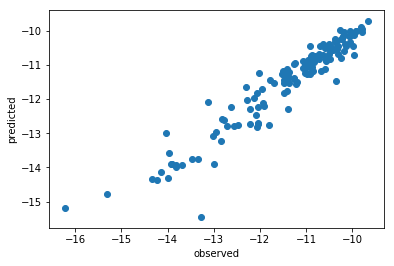

In [24]:
obs = np.array(y_test["LogOH"])
import matplotlib.pyplot as plt
plt.scatter(obs, results)
plt.ylabel('predicted')
plt.xlabel('observed')
plt.show()

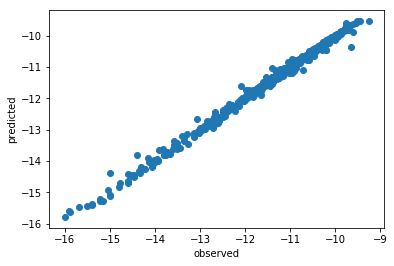

In [25]:
results1 = exported_pipeline.predict(training_features)
obs = np.array(y_train["LogOH"])
import matplotlib.pyplot as plt
plt.scatter(obs, results1)
plt.ylabel('predicted')
plt.xlabel('observed')
plt.show()

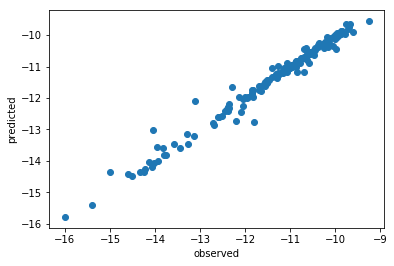

In [26]:
results2 = exported_pipeline.predict(features_standard)
import matplotlib.pyplot as plt
plt.scatter(observed, results2)
plt.ylabel('predicted')
plt.xlabel('observed')
plt.show()